In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一系列x值
x = np.linspace(-5, 5, 400)

# 计算Tanh函数的值
tanh_x = np.tanh(x)

# 绘制Tanh函数的图像
plt.figure(figsize=(8, 5))
plt.plot(x, tanh_x, label='Tanh(x)', color='b')
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('Tanh(x)')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
# 腐蚀图像
import numpy as np

# 定义输入图像
input_image = np.array([[0, 0, 0, 0, 0],
                        [0, 1, 1, 1, 0],
                        [0, 1, 1, 1, 0],
                        [0, 1, 1, 1, 0],
                        [0, 0, 0, 0, 0]], dtype=np.uint8)

# 定义膨胀和腐蚀的结构元素（核）
kernel_dilation = np.array([[1, 1],
                            [1, 1]], dtype=np.uint8)

kernel_erosion = np.array([[1, 1],
                           [1, 1]], dtype=np.uint8)

# 使用向量运算实现膨胀
def dilate(image, kernel):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            if np.sum(padded_image[i-1:i+2, j-1:j+2] * kernel) > 0:
                result[i-1, j-1] = 1
                
    return result

# 使用向量运算实现腐蚀
def erode(image, kernel):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=1)
    
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            if np.sum(padded_image[i-1:i+2, j-1:j+2] * kernel) == np.sum(kernel):
                result[i-1, j-1] = 1
                
    return result

# 调用膨胀和腐蚀函数
dilated_image = dilate(input_image, kernel_dilation)
eroded_image = erode(input_image, kernel_erosion)

print("原始图像：")
print(input_image)
print("膨胀后的图像：")
print(dilated_image)
print("腐蚀后的图像：")
print(eroded_image)


ValueError: operands could not be broadcast together with shapes (3,3) (2,2) 

## 绘制(x,y)对应的灰度图像


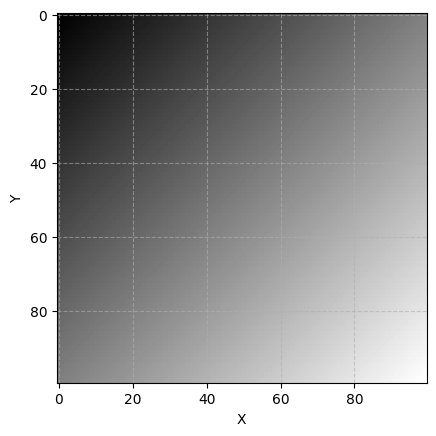

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义图像的宽度和高度
width = 100
height = 100

# 创建一个空的图像数组，初始化为零
image = np.zeros((height, width), dtype=np.uint8)

# 定义一个函数 f(x, y) 来分配灰度值
def f(x, y):
    # 这是一个示例函数，您可以根据需要修改它
    return (x + y) % 256  # 这里是一个简单的示例函数

# 使用循环为每个坐标赋灰度值
for y in range(height):
    for x in range(width):
        image[x, y] = f(x, y)

# 显示图像
plt.imshow(image, cmap='gray')

# 添加坐标轴
plt.xlabel('X')
plt.ylabel('Y')

# 显示坐标轴刻度
plt.xticks(np.arange(0, width, step=20))
plt.yticks(np.arange(0, height, step=20))

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 读取图像（请将文件路径替换为您自己的图像文件）
image = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)

# 获取图像的高度和宽度
height, width = image.shape

# 定义一个空的函数 f
f = np.zeros((height, width), dtype=np.uint8)

# 遍历图像像素，并将灰度值赋给函数 f
for y in range(height):
    for x in range(width):
        f[y, x] = int(image[y, x] * 255)  # 将图像的0-1范围映射到0-255的灰度值范围

# 显示逆转后的函数 f
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'cv2'

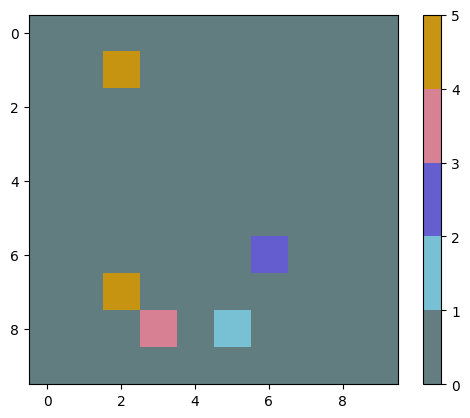

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define image size and number of regions
image_size = (10, 10)  # Adjust the size of your image (rows, columns)
K = 5  # Number of disjoint regions

# Create an empty image with zeros
image = np.zeros(image_size, dtype=int)

# Generate random disjoint regions
for region_id in range(1, K + 1):
    while True:
        x, y = np.random.randint(1, image_size[0] - 1), np.random.randint(1, image_size[1] - 1)
        if image[x, y] == 0:
            image[x, y] = region_id
            break

# Select one region as foreground and the rest as background
foreground_region = 1  # Change this to the region you want as foreground

# Create a colormap for visualization
cmap = ListedColormap(np.random.rand(K, 3))

# Set colors for foreground and background
cmap.colors[foreground_region - 1] = [1, 0, 0]  # Red for foreground

# Display the image with regions
plt.imshow(image, cmap=cmap)
plt.colorbar()
plt.show()
